In [40]:
import calendar
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import sqlite3

All imports, needed for this project, in alphabetical order.

In [41]:
url = "https://api.fortnitetracker.com/v1/profile/account/b7c3c6c66e08499eade89c43f31ea2be/matches"
headers = {'TRN-Api-Key':'07678e9b-0fe4-447b-907d-8d141073f496'}

r = requests.get(url, headers=headers)

Requesting data from the Fortnite TRN match traker API

In [42]:
r

<Response [200]>

Response [200] All is well!

In [53]:
datasnapshot = r.json()
conn = sqlite3.connect('duo_beta_db.db')
JumbData = pd.DataFrame.from_dict(datasnapshot)
JumbData.to_sql("Jumb player data", conn, if_exists = 'append')


,dateCollected,id,kills,matches,playlist,score,top1,top10,top12,top25,top3,top5,top6,trnRating
0,2018-11-03T03:03:43.3570000,933981915,6,3,p10,441,0,0,1,0,0,0,0,1189.2
1,2018-11-02T21:44:49.0770000,933035438,4,1,p10,303,0,0,1,0,0,0,0,1247.3
2,2018-11-02T21:38:41.6700000,933013861,17,8,p9,1544,0,0,0,0,0,0,1,1481.2
3,2018-11-02T21:38:41.6400000,933013860,3,3,p10,499,0,0,2,0,0,0,0,1190.2
4,2018-10-29T15:31:39.0270000,919163071,37,16,p9,4069,2,0,0,0,4,0,5,1272.2
5,2018-10-29T15:31:39.0100000,919163070,1,1,p10,92,0,0,0,0,0,0,0,1170.5
6,2018-10-29T15:31:38.9930000,919163068,2,5,p10,621,0,0,1,0,0,1,0,1152.1
7,2018-10-26T07:44:49.0430000,906720341,2,1,p10,382,0,0,1,0,0,0,0,1211.4
8,2018-10-26T02:17:43.9170000,906210502,10,9,p10,777,0,0,0,0,0,0,0,1192.4
9,2018-10-26T01:25:49.3970000,906101776,7,4,p2,717,0,1,0,1,0,0,0,1203.8


In [44]:
#SQL QUERY
query = 'select * from "Jumb Player Data"'

#Python to pull the output of SQL Query into a pandas dataframe(saved as 'games')
games = pd.read_sql(query, conn)

In [45]:
games = games.drop_duplicates(['id'], keep = 'first')

Removing any duplicate files from the data set.

In [46]:
len(games)
games

,index,dateCollected,id,kills,matches,playlist,score,top1,top10,top12,top25,top3,top5,top6,trnRating
0,0,2018-10-20T18:32:28.1830000,888171863,1,2,p9,358,0,0,0,0,0,0,1,1270.2
1,1,2018-10-20T18:32:28.1800000,888171862,4,2,p10,146,0,0,0,0,0,0,0,1193.2
2,2,2018-10-20T17:46:19.8430000,887988136,12,2,p2,494,0,1,0,1,0,0,0,1259.9
3,3,2018-10-20T17:36:12.3630000,887948653,11,8,p2,720,0,0,0,2,0,0,0,1144.9
4,4,2018-10-20T01:50:14.5900000,885504080,0,1,p9,32,0,0,0,0,0,0,0,1351.8
5,5,2018-10-20T01:24:33.6300000,885434996,10,3,p9,896,1,0,0,0,1,0,1,1449.4
6,6,2018-10-20T00:52:43.7470000,885347553,9,7,p9,1173,0,0,0,0,0,0,1,1245.3
7,7,2018-10-20T00:52:43.7170000,885347551,43,11,p10,2157,0,0,3,0,0,3,0,1193.5
8,8,2018-10-18T10:59:08.6030000,879857345,59,29,p2,3676,0,2,0,8,0,0,0,1197.5
9,9,2018-10-18T10:59:08.5870000,879857343,1,2,p10,134,0,0,0,0,0,0,0,1179.2


In [54]:
query = "Select sum(kills) kills, sum(matches) matches, ((sum(kills)/1.0)/sum(matches)) kpm, "\
"substr(dateCollected, 0, 11) date, '' dayofweek, '' weeknumber from 'Jumb player data' group by substr(dateCollected, 0, 11) order by date "

player2 = pd.read_sql(query, conn)
def dateToDay(date):
    day = datetime.datetime.strptime(date,'%Y-%m-%d')
    weekday = calendar.day_name[day.weekday()]
    return weekday

def weekNumber(date):
    weekNumber = datetime.datetime.strptime(date,'%Y-%m-%d').isocalendar()[1]
    return weekNumber

for index, row in player2.iterrows():
    weekday = dateToDay(row['date'])
    player2.at[index, 'dayofweek'] = weekday
    weeknumber = weekNumber(row['date'])
    player2.at[index, 'weeknumber'] = weeknumber

In [67]:
player2.loc[player2['weeknumber'] == 41]

,kills,matches,kpm,date,dayofweek,weeknumber
0,45,25,1.800000,2018-10-11,Thursday,41
1,623,316,1.971519,2018-10-12,Friday,41
2,1242,414,3.000000,2018-10-13,Saturday,41
3,324,180,1.800000,2018-10-14,Sunday,41


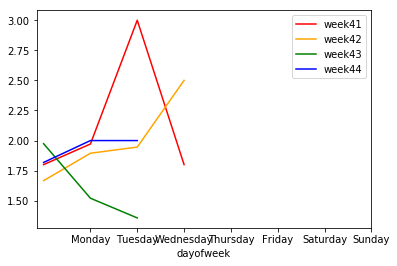

In [73]:
ax = plt.gca()

player2.loc[player2['weeknumber'] == 41].plot(kind='line', x='dayofweek', y='kpm', color='red', label = "week41", ax=ax)
player2.loc[player2['weeknumber'] == 42].plot(kind='line', x='dayofweek', y='kpm', color='orange', label = "week42", ax=ax)
player2.loc[player2['weeknumber'] == 43].plot(kind='line', x='dayofweek', y='kpm', color='green', label = "week43", ax=ax)
player2.loc[player2['weeknumber'] == 44].plot(kind='line', x='dayofweek', y='kpm', color='blue', label = "week44", ax=ax)
plt.xticks([1, 2, 3, 4, 5, 6, 7],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.show()